# Data Exploration - Iris Dataset
In this notebook we perform basic data exploration on the Iris data set:

https://en.wikipedia.org/wiki/Iris_flower_data_set

First, we load the libraries we need for the analysis.

In [1]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

Let's load the Iris dataset

In [2]:
iris = pd.read_csv('IrisCategorical.csv')

iris.head(5)



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The Id column is useless for any type of analysis so we drop it.

In [3]:
iris = iris.drop('Id', axis=1)

In [4]:
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:

iris.head(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's get some statistics for continuous attributes

In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


And some statistics about the class attribute Species

In [10]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Let's plot the distribution of SepalLengthCm 

In [5]:

from scipy.stats import iqr
numerical_variables = iris.columns[iris.columns!='Species']

print('Variable Range')
for c in numerical_variables:
    print('%s\t%.3f'%(c,np.max(iris[c]) - np.min(iris[c])))

print('\n\nInterquartile Range')
for c in numerical_variables:
    print('%s\t%.3f'%(c,iqr(iris[c])))
numerical_variables

Variable Range
SepalLengthCm	3.600
SepalWidthCm	2.400
PetalLengthCm	5.900
PetalWidthCm	2.400


Interquartile Range
SepalLengthCm	1.300
SepalWidthCm	0.500
PetalLengthCm	3.500
PetalWidthCm	1.500


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

We can compute correlations among attributes.

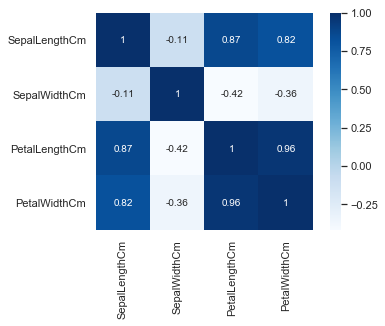

In [11]:
cov=iris.corr(method='pearson')

sns.heatmap(cov,square=True,annot=True,cmap="Blues");

We can further analyze the relations among variables by using clustermaps on the correlation matrix

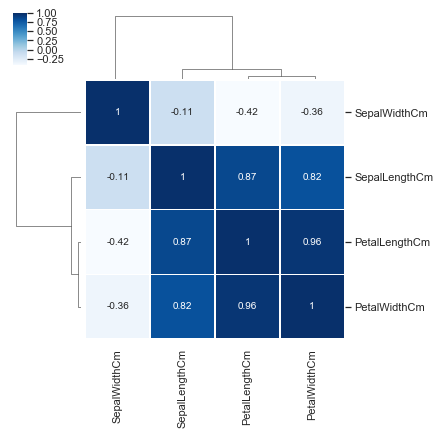

In [12]:
sns.clustermap(iris.corr(), square=True, annot=True, cmap="Blues", linewidths=.75, figsize=(6, 6));

Or over the original dataset

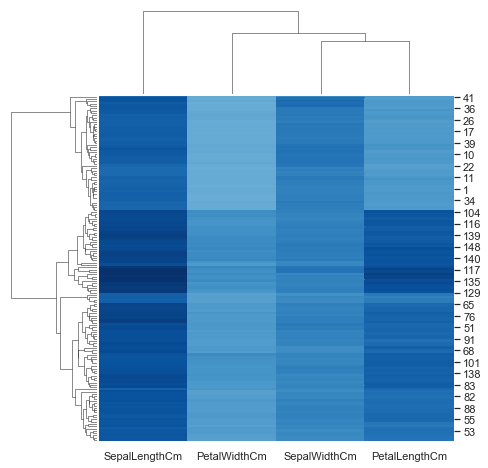

In [14]:
cm = sns.clustermap(iris[numerical_variables], annot=False, center=0, cmap="Blues", figsize=(8, 8))
cm.cax.set_visible(False)

We check how features vary with each data input

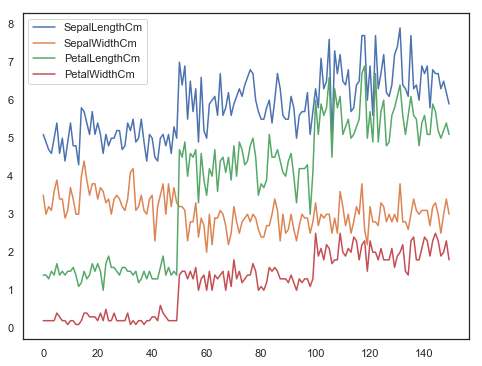

In [14]:
plt.figure(figsize=(8,6)) 
plt.plot(iris['SepalLengthCm'])
plt.plot(iris['SepalWidthCm'])
plt.plot(iris['PetalLengthCm'])
plt.plot(iris['PetalWidthCm'])
plt.legend(loc='best');

For each class value (Iris-versicolor, Iris-setosa, and Iris-virginica) we compute the mean values and plot them using a bar plot.

<Figure size 864x648 with 0 Axes>

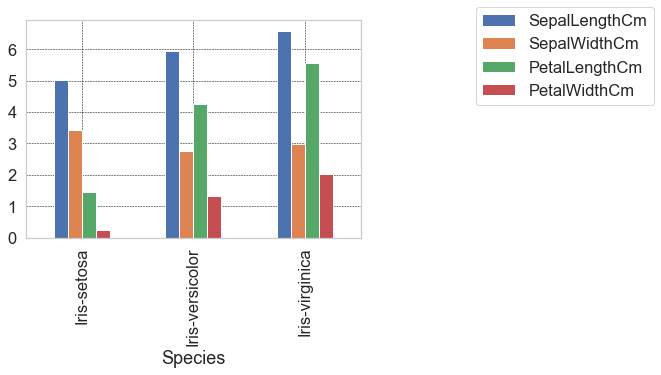

In [57]:
plt.figure(figsize=(12, 9));
# sns.set_context("poster", font_scale=.8, rc={"lines.linewidth": 2.5})
#sns.set_context(font_scale=.8, rc={"lines.linewidth": 2.5});
iris_gb=iris.groupby(['Species']).mean();
iris_gb.plot(kind='bar');
plt.grid(color='black', linestyle='--', linewidth=.5);
plt.yticks(np.arange(0, 7, step=1.0));
#plt.xlabel("");
# plt.tight_layout()
plt.legend(loc='upper right',bbox_to_anchor=(1.9, 1.1));


In [25]:
iris_gb.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


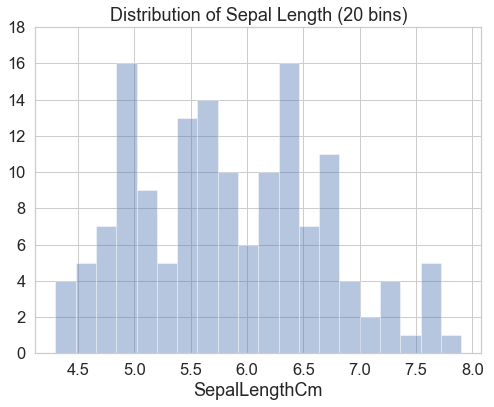

In [58]:
plt.figure(figsize=(8, 6))
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

dp = sns.distplot(iris['SepalLengthCm'],kde=False,bins=20)
dp.set_title('Distribution of Sepal Length (20 bins)');
#plt.tight_layout();
plt.yticks(np.arange(0, 20, step=2.0));

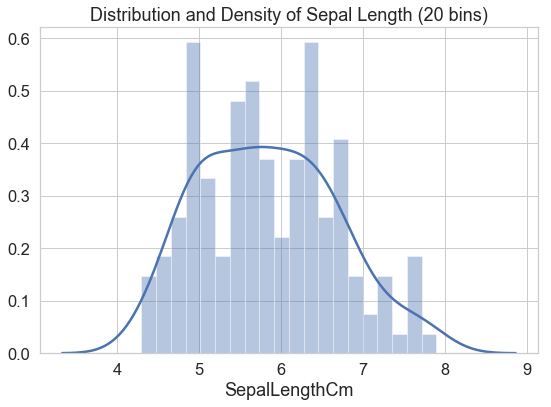

In [42]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(iris['SepalLengthCm'],bins=20)
dp.set_title('Distribution and Density of Sepal Length (20 bins)');
plt.tight_layout();

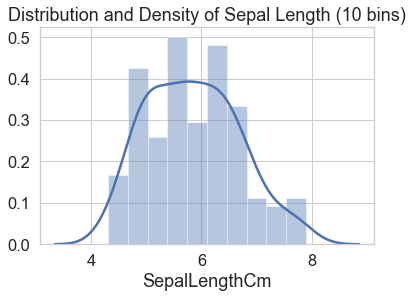

In [43]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(iris['SepalLengthCm'],bins=10)
dp.set_title('Distribution and Density of Sepal Length (10 bins)');

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


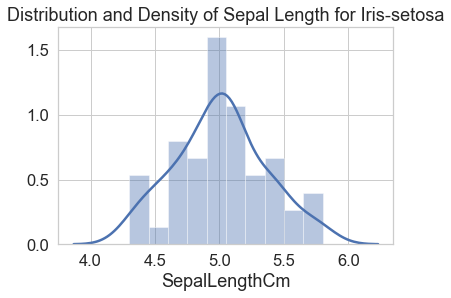

In [45]:
iris_is = iris[iris['Species'] == 'Iris-setosa']

hist1 = sns.distplot(iris_is['SepalLengthCm'],bins=10)
hist1.set_title('Distribution and Density of Sepal Length for Iris-setosa');
iris_is.head()

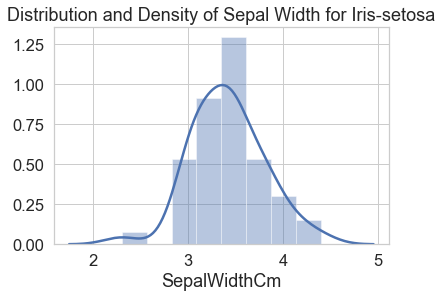

In [21]:
hist2 = sns.distplot(iris_is['SepalWidthCm'])
hist2.set_title('Distribution and Density of Sepal Width for Iris-setosa');

We can plot the distribution for each class.

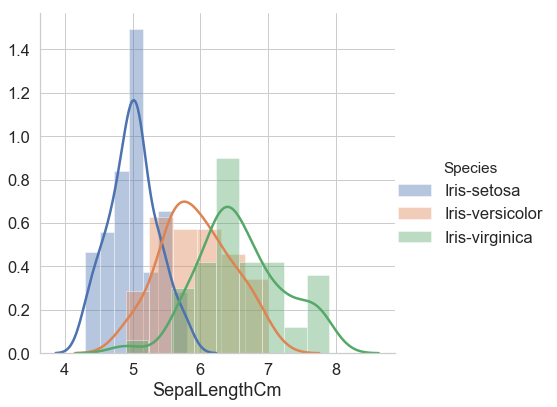

In [22]:
sns.FacetGrid(iris, hue="Species",size=6) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();

And now we use scatter plots.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


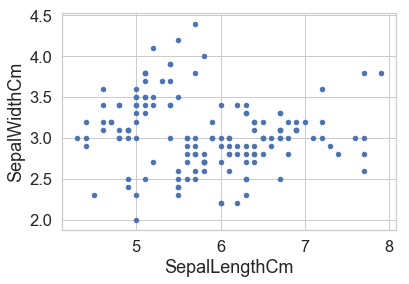

In [63]:
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm");

We can also add the information about the class.

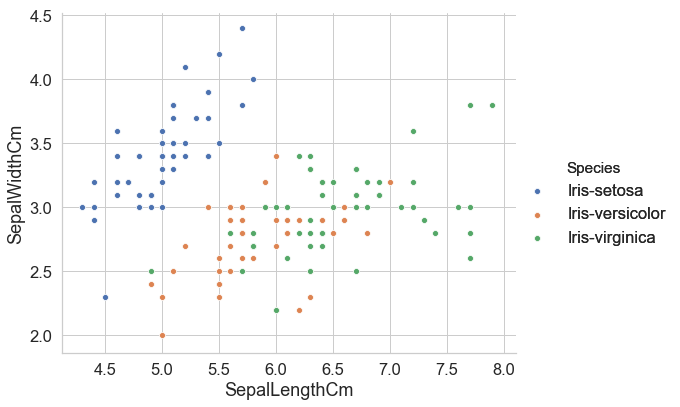

In [66]:
sns.pairplot(iris, x_vars=["SepalLengthCm"], y_vars=["SepalWidthCm"], hue="Species",size=6) \
   .add_legend();

We can combine histograms and histograms in the same figure.

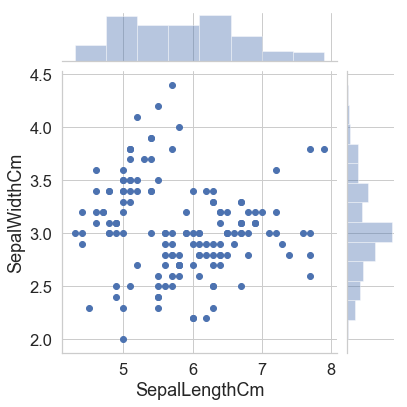

In [25]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=6);

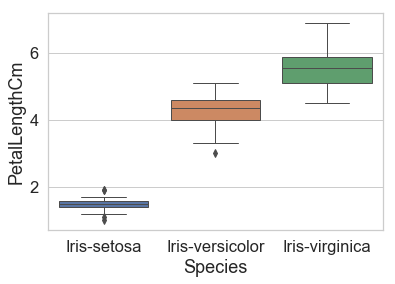

In [26]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

We can also add the scatter plot for every boxplot.

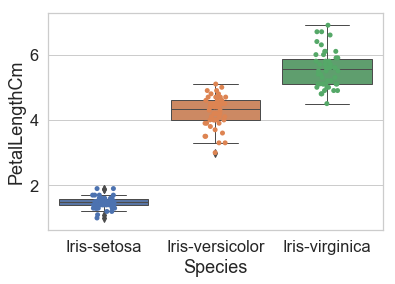

In [77]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
ax = sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

We can plot the scatter plots for the pairwise attribute combinations.

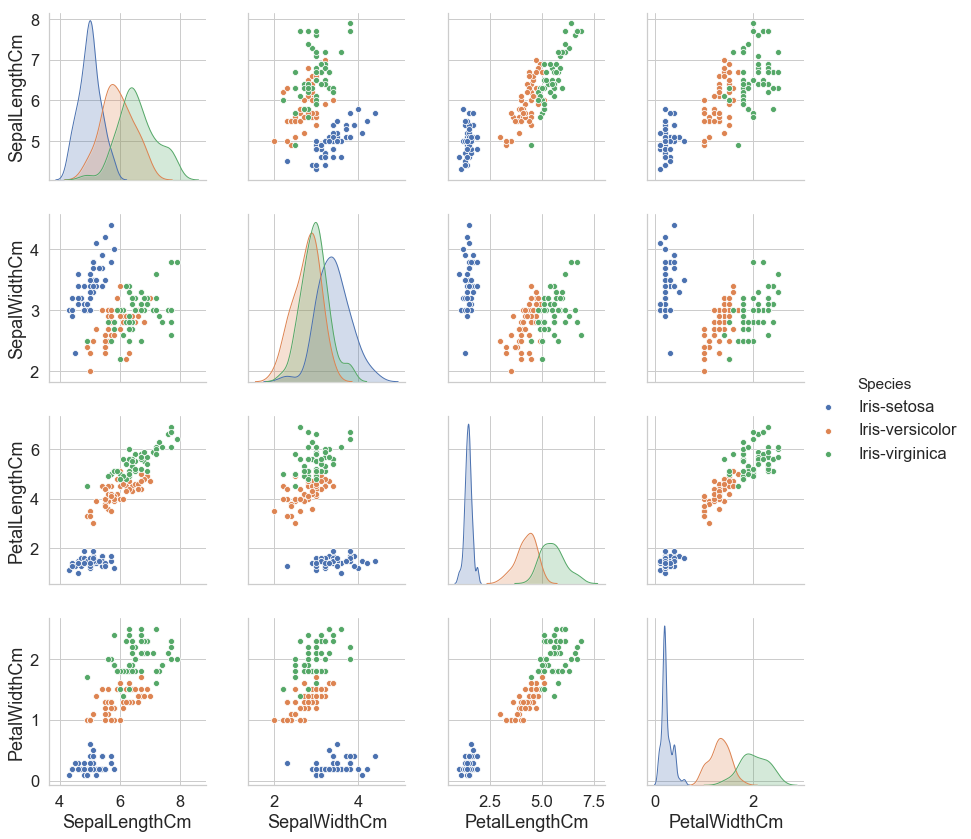

In [71]:
sns.pairplot(iris,hue="Species",size=3);

We can replace the diagonal bar plots with a gaussian kernel density estimate.

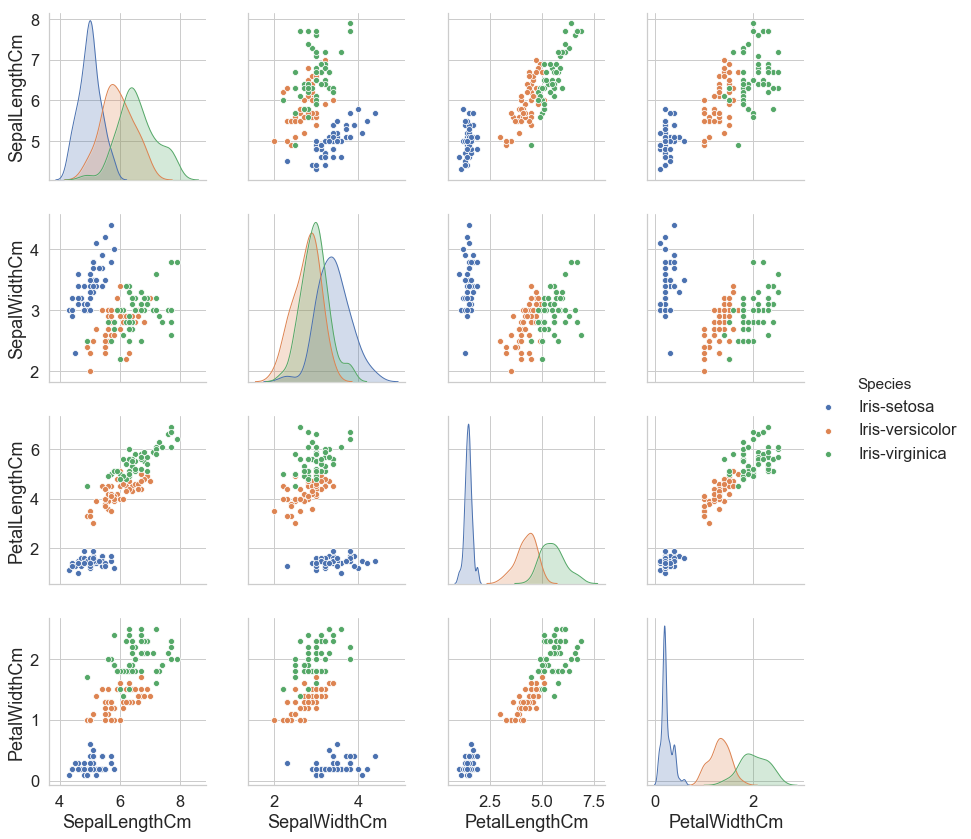

In [72]:
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde");

Similarly we can do the same for boxplots.

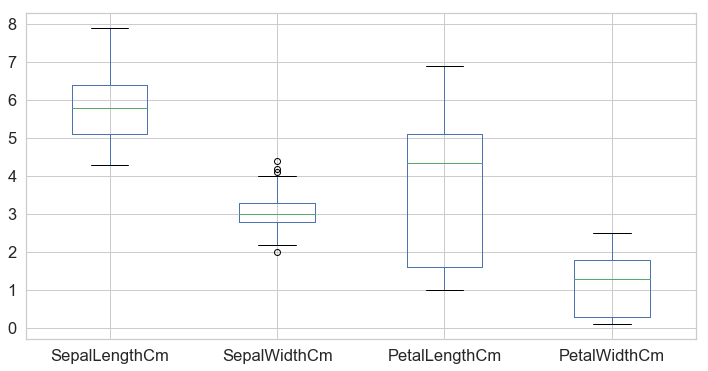

In [78]:
iris.boxplot( figsize=(12, 6));

## Principal Component Analysis

So far we used only some data dimensions for visualization. We now apply Principal Component Analysis to project the four original dimensions into a two dimensional space.

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values
x


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Principal component analysis is affected by attribute scale so we normalize all the attributes by eliminating the mean and scaling to unit variance.

In [83]:
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [98]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(x)
pca_iris = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2'])
pca_iris.head()
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [99]:
pca_iris_complete = pca_iris
pca_iris_complete['Species'] = iris["Species"]
pca_iris_complete.head()

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


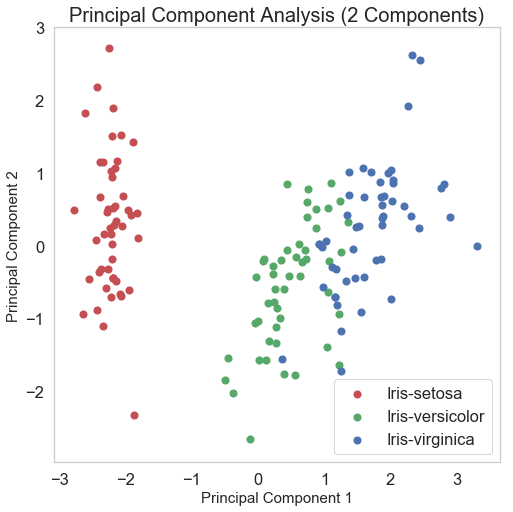

In [100]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_iris_complete['Species'] == target
    ax.scatter(pca_iris_complete.loc[indicesToKeep, 'principal component 1']
               , pca_iris_complete.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

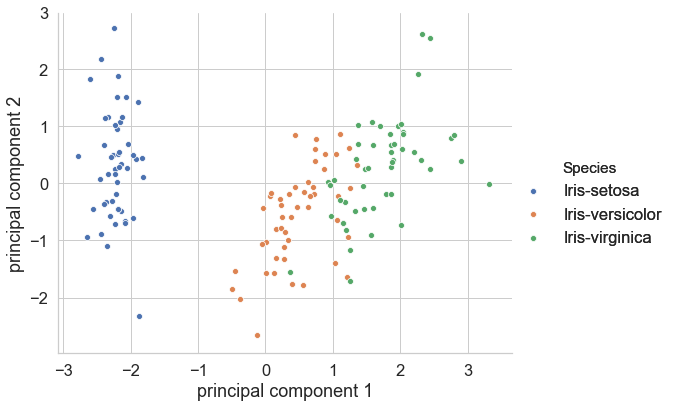

In [92]:
sns.pairplot(pca_iris_complete, x_vars=["principal component 1"], y_vars=["principal component 2"], hue="Species",size=6) \
   .add_legend();

In [101]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))


Explained Variance
   Component 1 0.73
   Component 2 0.23
   Total Explained Variance 0.96


In [102]:
print("Components")
for i,c in enumerate(pca.components_):
    print("Component %d\t%s"%(i,str(c)))

Components
Component 0	[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Component 1	[0.37231836 0.92555649 0.02109478 0.06541577]


In [103]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [104]:
data = np.dot(x,np.transpose(pca.components_))
data[:5,:]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [38]:
pca_iris.head(5)

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


We can apply PCA with the same number of components as the 

In [110]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values
full_pca = PCA()
fitted = full_pca.fit_transform(x)
full_pca.explained_variance_ratio_


array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

# t-SNE

In [116]:
from sklearn.manifold import TSNE

perplexity=80
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300, random_state=100)
# tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_result = tsne.fit_transform(x)
tsne_result

[t-SNE] Computing 149 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 1.545674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.934044
[t-SNE] KL divergence after 300 iterations: 0.026414


array([[-1.3272102 ,  2.3728127 ],
       [-1.505772  ,  2.206809  ],
       [-1.5677601 ,  2.367186  ],
       [-1.432875  ,  2.0569894 ],
       [-1.3066053 ,  2.6980848 ],
       [-1.2793044 ,  2.3958058 ],
       [-1.4524212 ,  2.1369143 ],
       [-1.4578149 ,  2.592694  ],
       [-1.4808456 ,  1.9501369 ],
       [-1.4448333 ,  2.075173  ],
       [-1.0007805 ,  2.021068  ],
       [-1.5027295 ,  2.521828  ],
       [-1.5698946 ,  2.2416039 ],
       [-1.5921166 ,  1.9961936 ],
       [-0.9327972 ,  2.2041273 ],
       [-0.96792686,  2.642477  ],
       [-1.0935073 ,  2.6296358 ],
       [-1.3340567 ,  2.534129  ],
       [-0.9868601 ,  2.6572487 ],
       [-0.8958986 ,  1.9743412 ],
       [-1.1424074 ,  2.4850569 ],
       [-1.1431465 ,  2.4900978 ],
       [-1.6807846 ,  2.1476746 ],
       [-1.3202735 ,  2.1821985 ],
       [-1.0722929 ,  2.2950275 ],
       [-1.1843203 ,  1.973166  ],
       [-1.3157096 ,  2.6448102 ],
       [-1.3818182 ,  2.6992962 ],
       [-1.1432744 ,

In [121]:
iris_tsne = pd.DataFrame({'x':tsne_result[:,0], 'y':tsne_result[:,1], 'Species':iris['Species']})
iris_tsne2= pd.DataFrame(data=tsne_result,columns=["x","y"])
iris_tsne2["Species"]=iris["Species"]
iris_tsne2.head()

,x,y,Species
0,-1.327210,2.372813,Iris-setosa
1,-1.505772,2.206809,Iris-setosa
2,-1.567760,2.367186,Iris-setosa
3,-1.432875,2.056989,Iris-setosa
4,-1.306605,2.698085,Iris-setosa


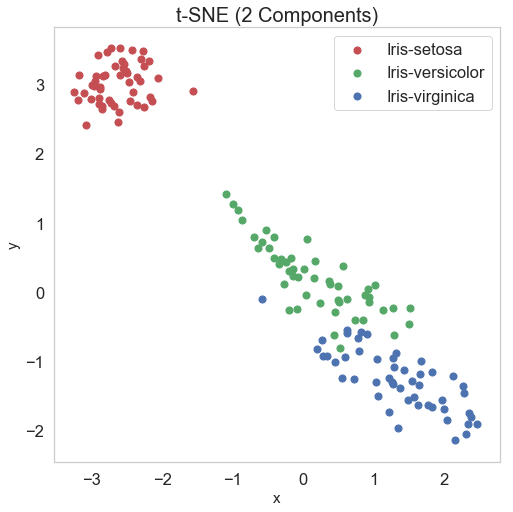

In [117]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('t-SNE (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_tsne['Species'] == target
    ax.scatter(iris_tsne.loc[indicesToKeep,'x'], iris_tsne.loc[indicesToKeep,'y'], c=color, s=50)
ax.legend(targets)
ax.grid()

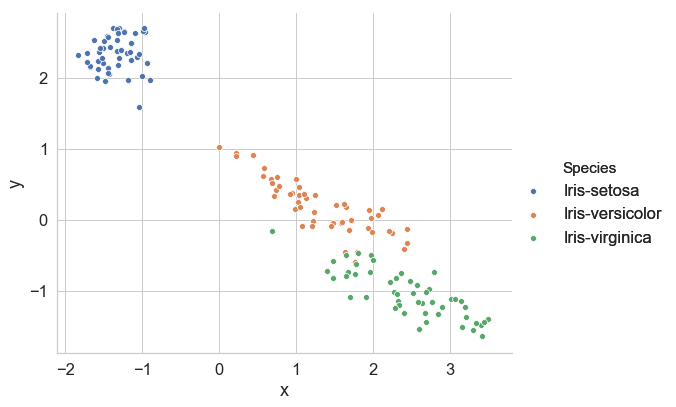

In [124]:
sns.pairplot(iris_tsne2, x_vars=["x"], y_vars=["y"], hue="Species",size=6) \
   .add_legend();